# Armen Khachatrian

## Problem 2: Selection bias vs. big data 

In [ ]:
%matplotlib inline
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.special
plt.style.use('seaborn-dark')



In [ ]:
# Total number of persons in the study
# Set large enough to make sampling variation negligible.
N = 10 ** 6

# Each person has an individual level of "charitability".
# We'll model this charitability as being normally distributed.
charitability = np.random.normal(loc=-1, scale=0.5, size=N)


# Draw the potential outcomes from a lognormal distribution.
# The outcome Y0 has a mean based on the charitability level:
# A higher charitability tends to increase the donation amount.
# Y1 is set to be identical to Y0. This means the ad has no effect!
Y0 = np.random.lognormal(mean=(charitability + 0.5), sigma=0.1, size=N)
Y1 = Y0.copy()

# The probability of searching for Doctors Without Borders is
# a function of the charitability level. People who are more 
# charitable are more likely to search for DWB.
# We assume that anyone who searches for DWB will see the DWB ad.
prob_search_dwb = scipy.special.expit(charitability)
D = np.random.binomial(n=1, p=prob_search_dwb)

# Calculate the *actual* outcome.
Y = Y1 * D + Y0 * (1 - D)

# Put the data together for analysis.
df = pd.DataFrame({
    'D': D, 
    'Y0': Y0, 
    'Y1': Y1, 
    'Y': Y, 
    'delta': Y1 - Y0,
    'C': charitability,
})



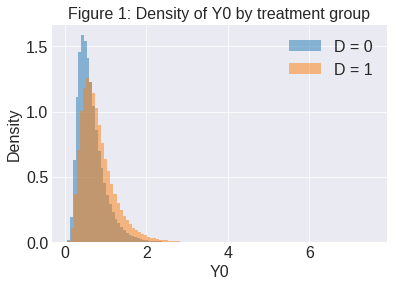

In [ ]:
column_to_plot = 'Y0'
ax = df.query('D==0')[column_to_plot].hist(bins=100, alpha=0.5, density=True, label='D = 0')
ax = df.query('D==1')[column_to_plot].hist(bins=100, alpha=0.5, density=True, ax=ax, label='D = 1')
ax.legend(fontsize=16)
ax.set_xlabel(column_to_plot, fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.set_title("Figure 1: Density of {} by treatment group".format(column_to_plot), fontsize=16)
ax.tick_params(labelsize=16)
 

In [ ]:
# Tabulate all the averages sliced by treatment vs. control
df.groupby('D').mean()

,Y0,Y1,Y,delta,C
D,,,,,
0,0.642206,0.642206,0.642206,0.0,-1.067444
1,0.815015,0.815015,0.815015,0.0,-0.827471


In [ ]:
# Here's another way to calculate the averages from the table.

# Calculate E[Y]
df['Y'].mean()

# Calculate E[Y0 | D=0]
print("E[Y0|D=0] = {}".format(df.query("D == 0")['Y0'].mean()))

print("E[Y1|D=1] = {}".format(df.query("D == 1")['Y1'].mean()))

print("E[Y1|D=1] - E[Y0|D=0] = {}".format(df.query("D == 1")['Y1'].mean() - df.query("D == 0")['Y0'].mean()))

E[Y0|D=0] = 0.6422059457282716
E[Y1|D=1] = 0.8150147928471
E[Y1|D=1] - E[Y0|D=0] = 0.17280884711882838


## TASK 1
## Write down the NATE decomposition equation and write the value of each of the four components.

In [ ]:
Y1mean = df['Y1'].mean()
Y0mean = df['Y0'].mean() 
ate = Y1mean - Y0mean
print ("ATE = ", ate)

ATE =  0.0


In [ ]:
Selbias = df.query("D == 1")['Y0'].mean() - df.query("D == 0")['Y0'].mean()
print("Selection bias = ", Selbias)

Selection bias =  0.17280884711882838


In [ ]:
att = df.query("D == 1")['Y1'].mean() - df.query("D == 1")['Y0'].mean()
atc = df.query("D == 0")['Y1'].mean() - df.query("D == 0")['Y0'].mean()
#ate = p(att-atc) + atc 
#p = (ate-atc)/(att-atc)
p = prob_search_dwb.mean()
deb = p*(att-atc)
print("Diff. effect bias = ", deb)

Diff. effect bias =  0.0


In [ ]:
nate = ate+Selbias+deb
nate

0.17280884711882838

## TASK 2 
##Make a function selection_bias(n) that calculates the selection bias in just the first n units of data ("sample size of n"). Try it for a few different values of n.

In [ ]:
n = 100
def selection_bias (n):
  dff = df[:n]
  selb = dff.query("D == 1")['Y0'].mean() - dff.query("D == 0")['Y0'].mean()
  return selb
x = selection_bias(n)
print("Selection bias for (n = ", n, ") = ", x)

Selection bias for (n =  100 ) =  0.1342067416539633


## TASK 3

##Demonstrate that the law of large numbers applies to selection bias. Make a graph of bias for n ranging from 0 to 10,000. Where is the line converging to?

In [ ]:
from functools import partial



In [ ]:
z=[]
for i in range(0, 10000):
  x = selection_bias(i)
  z.append(x)
ar = np.asarray(z)
z

[nan,
 nan,
 nan,
 0.3775947828415551,
 0.44919302676842127,
 0.3543764797808906,
 0.3761137704234022,
 0.4698318720070238,
 0.717145369515404,
 0.7288910816957272,
 0.7123474113558624,
 0.5509662819180182,
 0.40543025237938035,
 0.45246323549214373,
 0.4471342543033211,
 0.4516104174020814,
 0.4345929687381981,
 0.42364242339718927,
 0.4428540894566473,
 0.3748013560933692,
 0.4004604230455857,
 0.3133106086062939,
 0.341689982254367,
 0.34321413446979465,
 0.3258628002386573,
 0.34742676779903614,
 0.2745165802996561,
 0.2884442236434761,
 0.2552901767547352,
 0.24909251439688485,
 0.2484350608651299,
 0.20407501737877376,
 0.2719125291619523,
 0.25797906841684193,
 0.25615291092896686,
 0.25854073094175667,
 0.2692426985453886,
 0.27594194260937854,
 0.2560839626707313,
 0.3012971996989211,
 0.3115605299471562,
 0.30476151896576886,
 0.31323938356773273,
 0.3182815664431652,
 0.3116992207925836,
 0.3132812044237826,
 0.3149250056093995,
 0.3037567478548564,
 0.31512939304846055,
 0.

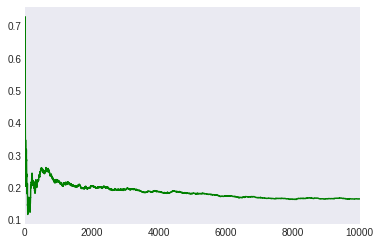

In [ ]:
plott = pd.Series(z)
plott.plot.line(color='green')